# Packages

In [300]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import xarray as xr
from scipy.io import loadmat
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import statistics as stats
from matplotlib.patches import Ellipse, Polygon
from textwrap import wrap

# Read data

In [301]:
filepath_SEAs = r'C:\Users\sbtin3\Documents\Python\Doc\SequentialExtractionCleaned.csv'
df_SEAs = pd.read_csv(filepath_SEAs)
MR = df_SEAs.head(4)
CG = df_SEAs.iloc[[4,5,6,7]]
JF = df_SEAs.iloc[[8,9,10,11]]
LG = df_SEAs.iloc[[12,13,14,15]]
CN = df_SEAs.iloc[[16,17,18,19]]
df_SEAs

,Site,Depth,Exchangable,Specifically Sorbed,Amorphous Fe/Al Oxides,Crystalline Fe/Al Oxides,Residual
0,MR,0-10,25.852000,108.342333,804.727000,144.411667,222.812667
1,MR,10-20,95.410000,139.586000,4669.843000,457.287000,456.673333
2,MR,20-30,112.756667,148.825333,4379.033333,545.990667,996.688333
3,MR,30-50,211.215667,277.397333,4556.258333,648.711667,1135.710667
4,CG,0-10,25.285333,149.656333,688.337667,46.662000,158.869000
5,CG,10-20,30.987000,194.723333,1069.957667,74.788333,343.266000
6,CG,20-30,34.950000,188.275667,1233.226333,197.055333,784.409000
7,CG,30-50,87.764333,320.674000,2403.408000,255.432333,691.703333
8,JF,0-10,292.199000,234.108667,1574.481333,335.886000,785.459667
9,JF,10-20,509.851000,377.042667,3202.426333,368.217000,1038.307333


# Define Data

In [302]:
#This will define each column without taking the means
Ex = df_SEAs['Exchangable']
Sp = df_SEAs['Specifically Sorbed']
Am = df_SEAs['Amorphous Fe/Al Oxides']
Cr = df_SEAs['Crystalline Fe/Al Oxides']
Re = df_SEAs['Residual']
depth = df_SEAs['Depth']
Ex

0      25.852000
1      95.410000
2     112.756667
3     211.215667
4      25.285333
5      30.987000
6      34.950000
7      87.764333
8     292.199000
9     509.851000
10    368.348000
11    227.801333
12     35.595667
13     32.960000
14     45.457333
15     16.757333
16     10.488667
17     19.846333
18     16.190000
19     13.559000
Name: Exchangable, dtype: float64

# Plots

In [303]:
# #This plot will show the different size fraction averages for all depths, separated by site
# #current issue is that there isn't enough labels for the amount of bars I want
sites = ['MR', 'MR', 'MR', 'MR', 'CG','CG','CG','CG','JF','JF','JF','JF','LG','LG','LG','LG','CN','CN','CN','CN']
depth = ['0-10cm', '10-20cm', '20-30cm', '30-50cm','0-10cm', '10-20cm', '20-30cm', '30-50cm','0-10cm', '10-20cm', '20-30cm', '30-50cm','0-10cm', '10-20cm', '20-30cm', '30-50cm','0-10cm', '10-20cm', '20-30cm', '30-50cm']
labels = list(zip(sites,depth))
labels = ['%s, %s'%(labels[i][0],labels[i][1]) for i in range(len(labels))]
print(labels)

['MR, 0-10cm', 'MR, 10-20cm', 'MR, 20-30cm', 'MR, 30-50cm', 'CG, 0-10cm', 'CG, 10-20cm', 'CG, 20-30cm', 'CG, 30-50cm', 'JF, 0-10cm', 'JF, 10-20cm', 'JF, 20-30cm', 'JF, 30-50cm', 'LG, 0-10cm', 'LG, 10-20cm', 'LG, 20-30cm', 'LG, 30-50cm', 'CN, 0-10cm', 'CN, 10-20cm', 'CN, 20-30cm', 'CN, 30-50cm']


In [304]:
# sites = ['MR', 'CG', 'JF', 'LG', 'CN']
# depths = ['0-10cm', '10-20cm', '20-30cm', '30-50cm']

# for i in range(len(sites)):
    # for j in range(len(depths)):
    #     labels = print(sites[i], depths[j])

C:\Users\sbtin3\AppData\Local\Temp\ipykernel_13684\803522090.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation = 55, va="center", position=(0,-0.05))


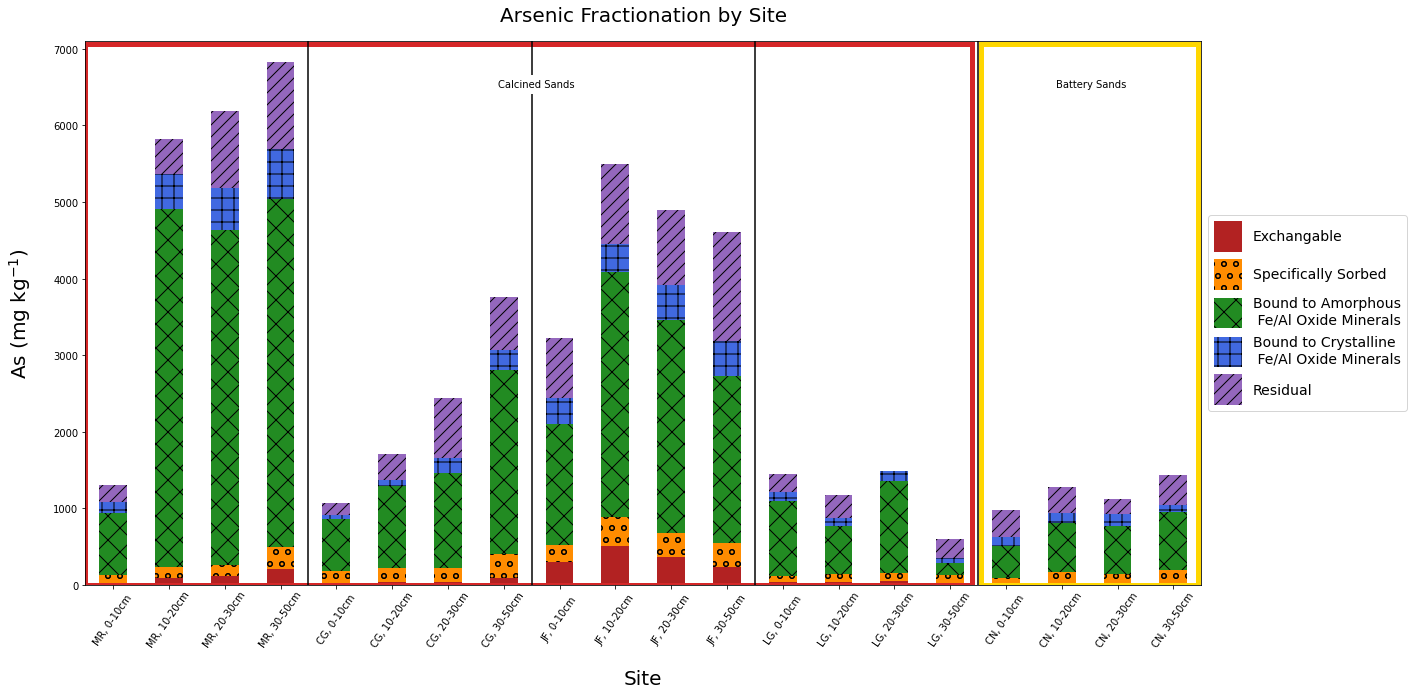

In [321]:
#this defines my categories that go up the columns (the fractions), using the means I made in the previous box. Turning the values into arrays let me stack them properly later on.
ExG = (Ex)
SpG = (Sp)
AmG = (Am)
CrG = (Cr)
ReG = (Re)

#this is the width of the bars/columns.
width = 0.5 

#BEGINNING OF ACTUAL PLOT 
fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(labels, ExG, width, label='Exchangable', color='firebrick')
plt.bar(labels, SpG, width, bottom=ExG,label='Specifically Sorbed',color='darkorange', hatch = "o")
plt.bar(labels, AmG, width, bottom=ExG+SpG,label='Bound to Amorphous\n Fe/Al Oxide Minerals',color='forestgreen', hatch = "x")
plt.bar(labels, CrG, width, bottom=ExG+SpG+AmG,label='Bound to Crystalline\n Fe/Al Oxide Minerals',color='royalblue', hatch = "+")
plt.bar(labels, ReG, width, bottom=ExG+SpG+AmG+CrG,label='Residual',color='tab:purple', hatch = "//")
plt.axis([-0.5,19.5,0,7100])

#Titles and Labels
ax.set_title('Arsenic Fractionation by Site', fontsize=20,pad=20)
ax.set_ylabel('As (mg kg$^{-1}$)',fontsize=20, labelpad=20)
ax.set_xlabel('Site',fontsize=20, labelpad=20)
legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14, markerfirst=True, markerscale=2.0, handleheight=3)
ax.set_xticks
ax.set_xticklabels(labels, rotation = 55, va="center", position=(0,-0.05))

rect1 = Rectangle((15.55,0),3.9,7070, fill=False, edgecolor='gold', lw=5)
rect2 = Rectangle((-0.5,0),15.9,7070, fill=False, edgecolor='tab:red', lw=5)
ax.add_patch(rect1)
ax.add_patch(rect2)
plt.axvline(x=3.5, color='k')
plt.axvline(x=7.5, color='k')
plt.axvline(x=11.5, color='k')
plt.axvline(x=15.5, color='k')
plt.text(6.9,6500,'Calcined Sands',backgroundcolor='w')
plt.text(16.9,6500,'Battery Sands',backgroundcolor='w')

plt.show()

In [ ]:
ax.set_xticklabels(lab,minor=True)
ax.tick_params(axis='x', which='major', pad=15, size=0)
plt.setp(ax.get_xticklabels(), rotation=0)